In [1]:

%load_ext autoreload
%autoreload 2

import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import tyssue as ty

from tyssue.core.sheet import Sheet
from tyssue.core.generation import three_faces_sheet
from tyssue.geometry.sheet_geometry import SheetGeometry  as geom
from tyssue.draw.mpl_draw import sheet_view
from tyssue.config import load_default

/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:

datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [4]:
sheet.jv_df.describe().head(3)

,z,basal_shift,y,is_active,rho,x,height
count,13,13,1.300000e+01,13,13.000000,13.000000,13.000000
mean,0,4,-8.540177e-18,1,1.491694,0.000000,-2.508306
std,0,0,1.172570e+00,0,0.582529,1.172604,0.582529


## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [28]:
draw_specs = load_default('draw', 'sheet')

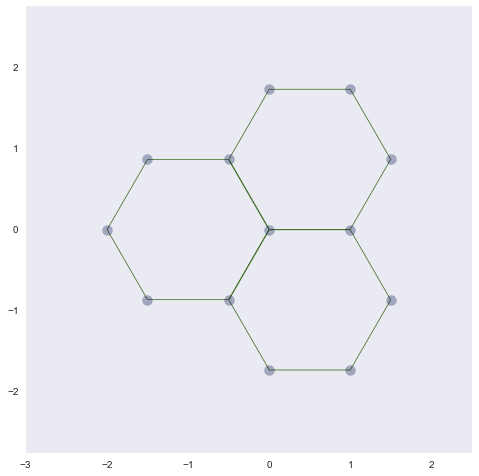

In [6]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


#### Coloring

In [7]:

## Let's add a column to sheet.jv_df
sheet.jv_df['rand'] = np.linspace(0.0, 1.0, 
                                  num=sheet.jv_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.jv_df.rand)

draw_specs['jv']['color'] = color_cmap
draw_specs['jv']['alpha'] = 0.5
draw_specs['jv']['s'] = 500

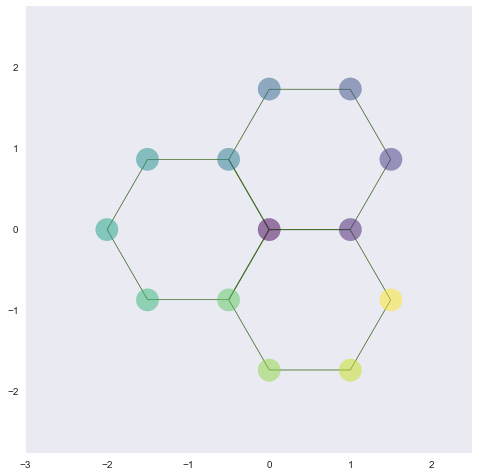

In [8]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

#### Filling the cells



In [12]:
from collections import abc

In [21]:
isinstance(color_cmap, (abc.Iterable, abc.Sized)), isinstance('abc', (abc.Iterable, abc.Sized))

(True, True)

In [10]:
color_cmap

array([[ 0.267004,  0.004874,  0.329415,  1.      ],
       [ 0.127568,  0.566949,  0.550556,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ]])

In [24]:
from matplotlib.colors import ColorConverter

In [32]:
cconv = ColorConverter()

cconv.to_rgba(draw_specs['face']['color'])

(0.5411764705882353, 0.6509803921568628, 0.47058823529411764, 1.0)

ValueError: to_rgba: Invalid rgba arg "[[ 0.267004  0.004874  0.329415  1.      ]
 [ 0.127568  0.566949  0.550556  1.      ]
 [ 0.993248  0.906157  0.143936  1.      ]]"
only length-1 arrays can be converted to Python scalars

> /home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/matplotlib/colors.py(376)to_rgba()
    375             raise ValueError(
--> 376                 'to_rgba: Invalid rgba arg "%s"\n%s' % (str(arg), exc))
    377 

ipdb> c


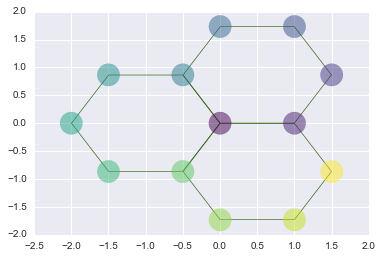

In [9]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap

fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based


In [9]:
coords = ['x', 'y', 'z']
eptm.jv_df['z'] = 1.
geom.update_all(eptm)

vertices, faces, cell_mask = eptm.triangular_mesh(coords)

In [10]:
import vispy as vp
import sys
import IPython

from IPython import display

from vispy import app, gloo, visuals, scene
from vispy.geometry import MeshData
#from vispy import plot
#vp.use('PyQt4')

from vispy.app.backends.ipython import VispyWidget

print('VisPy version: {}'.format(vp.__version__))


print('Python version: {}'.format(sys.version))
print('Jupyter version: {}'.format(IPython.__version__))

VisPy version: 0.5.0.dev0
Python version: 3.4.3 |Anaconda 2.3.0 (64-bit)| (default, Jun  4 2015, 15:29:08) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Jupyter version: 4.0.0


/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [11]:
cell_color = vp.color.ColorArray(cell_style['color'], alpha=0.8)

In [15]:
!ls ../leg_joint\ import

before_apoptosis.hf5  Import data from leg-joint.ipynb	nb_init.py


Hi,

Thank you for making vispy, 



The `_user_to_rgba` function does not accept `np.ndarray` or any other sequence that can pass through `np.asarray()`.

Is there a good reason for this?

Here is the (https://github.com/vispy/vispy/blob/master/vispy/color/color_array.py#L49)[relevant code]
```python
_user_to_rgba(color, expand=True, clip=False):
...
    elif isinstance(color, (list, tuple)):
        if any(isinstance(c, string_types) for c in color):
            color = [_user_to_rgba(c, expand=expand, clip=clip) for c in color]
            if any(len(c) > 1 for c in color):
                raise RuntimeError('could not parse colors, are they nested?')
            color = [c[0] for c in color]
```

one could add bellow those lines:

```python
   
```

In [ ]:
with pd.get_store('../leg_joint import/before_apoptosis.hf5') as store:
    cell_df = store.get('cell_df')
    jv_df = store.get('jv_df')
    je_df = store.get('je_df')
    
eptm = Epithelium('before', cell_df, jv_df, je_df)
vertices, faces, cell_mask = eptm.triangular_mesh(coords)

In [23]:

canvas = scene.SceneCanvas(keys='interactive', show=True)

grid = canvas.central_widget.add_grid()
view = grid.add_view(0, 1)
#view = canvas.central_widget.add_view()
view.camera =  'turntable'
view.camera.aspect = 1

cell_color = vp.color.ColorArray(cell_style['color'], alpha=0.5)
cell_color = cell_color.rgba.repeat(eptm.Nf, axis=0)

edge_color = vp.color.ColorArray(edge_arrow_style['color'], alpha=1)

view.bgcolor = vp.color.Color('#ffffff')


mesh = vp.scene.visuals.Mesh(vertices=vertices,
                             faces=faces,
                             face_colors=cell_color)

wire_pos = vertices[eptm.Nc:].copy()
wire_pos[:, 2] += 0.1

wire = vp.scene.visuals.Line(pos=wire_pos, 
                             connect=faces[:, :2]-eptm.Nc,
                             color=edge_color,
                             width=20)

view.add(mesh)
view.add(wire)
view.camera.set_range()
canvas.show()

#vp_widget = VispyWidget()
#vp_widget.set_canvas(canvas)



app.run()

0